<a href="https://colab.research.google.com/github/alexzhangaz48/INFO_6105_machine_learning/blob/main/Ver_2_0_INFO_6105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
#Import the training dataset csv file
from google.colab import files
uploaded = files.upload()

Saving training_dataset-1.csv to training_dataset-1 (1).csv


In [ ]:
txt_file = 'your_input.txt'
df = pd.read_csv(txt_file, delimiter='\t')

# Overview of the Data

1. Summary of Data

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.761400e+04,1.761400e+04,17614.000000,17614.000000,17614.000000,1.761400e+04,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000
mean,4.569068e+09,5.408514e+05,3.372431,2.113475,2080.915692,1.513310e+04,1.495856,0.007097,0.233848,3.409844,7.660100,1789.456398,291.459294,1970.917566,80.774384,98078.043204,47.560487,-122.214127,1985.633303,12680.009424
std,2.869570e+09,3.685506e+05,0.935641,0.773550,923.863759,4.194362e+04,0.540092,0.083944,0.765230,0.649949,1.179174,831.418845,443.419741,29.425821,393.288442,53.473239,0.138408,0.140161,685.581487,26713.761385
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.122052e+09,3.225000e+05,3.000000,1.500000,1420.000000,5.053250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471600,-122.328000,1480.000000,5100.000000
50%,3.904985e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.607000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572700,-122.230000,1840.000000,7600.000000
75%,7.300200e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.065000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10057.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

2. Visualization of the Data


In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

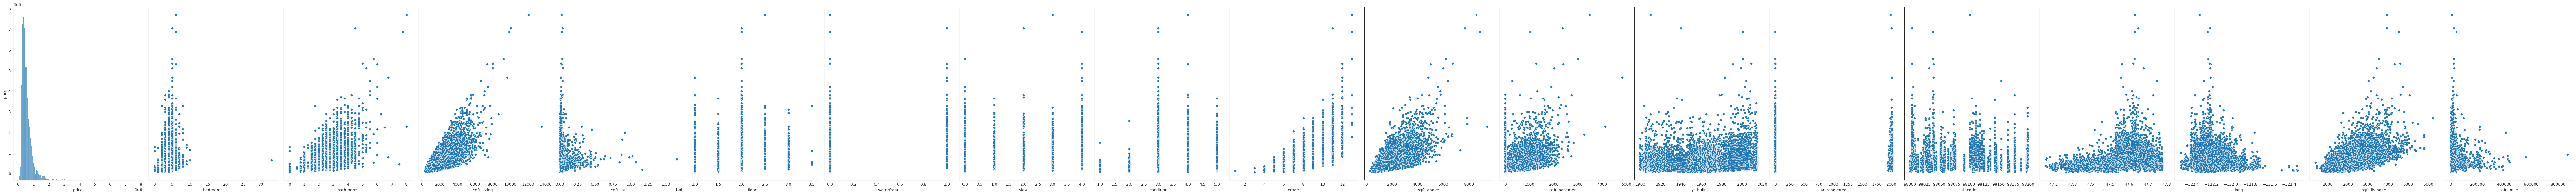

In [ ]:
sns.pairplot(df, x_vars=[ 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'], y_vars='price',size=7, aspect=0.7)

# Preprocessing and data cleaning

1. Encoding Date: only care about which month is each house sold

In [ ]:
import datetime
import time

In [ ]:
#change date column to date format
df['date'] = pd.to_datetime(df['date'])
#extract month from date column to a new month column
df['month_sold']=df['date'].dt.month

In [ ]:
#delete id and date features
df.drop(['id','date',],axis=1,inplace=True)

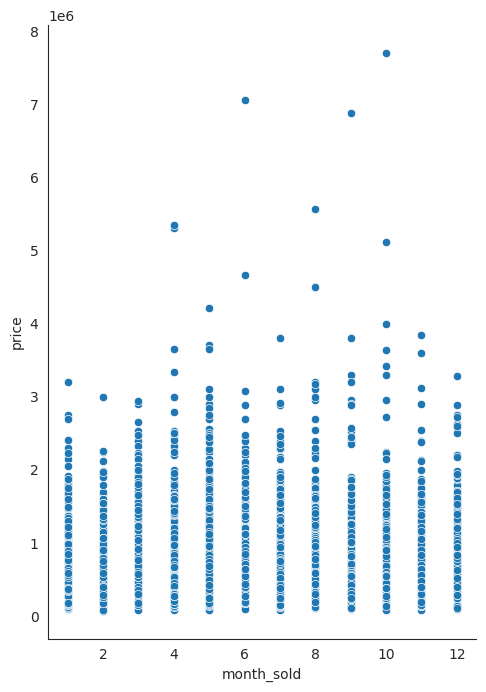

In [ ]:
sns.pairplot(df, x_vars=[ 'month_sold'], y_vars='price',size=7, aspect=0.7)

2. Since the "zipcode", "lat", and "long" features are all related to position information, we are removing "zipcode" feature from our model. Then the data is seperated into X (predictors) and y (outputs)

In [ ]:
X = df[[ 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15','month_sold']]

In [ ]:
y = df['price']

3. Build the model with all features to see the p-values

In [ ]:
import statsmodels.api as sm
from scipy import stats

In [ ]:
X = sm.add_constant(X)
model_all = sm.OLS(y,X)
res_all = model_all.fit()

In [ ]:
print(res_all.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     2335.
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:14:23   Log-Likelihood:            -2.4036e+05
No. Observations:               17614   AIC:                         4.808e+05
Df Residuals:                   17596   BIC:                         4.809e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.746e+07   1.79e+06    -20.942

  We need to remove "floors" because it has the highest larger p-value that is larger than 0.05

In [ ]:
X.drop(['floors',],axis=1,inplace=True)

In [ ]:
model_all = sm.OLS(y,X)
res_all = model_all.fit()
print(res_all.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     2481.
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:14:27   Log-Likelihood:            -2.4036e+05
No. Observations:               17614   AIC:                         4.808e+05
Df Residuals:                   17597   BIC:                         4.809e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.762e+07   1.76e+06    -21.376

4. Seperate the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.head()


,const,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_sold
8765,1.0,3,2.50,1790,4065,0,0,3,8,1790,0,2009,0,47.7344,-121.965,2480,4252,10
8957,1.0,4,2.50,1780,15000,0,0,2,7,1780,0,1993,0,47.4239,-122.153,2005,9680,3
6833,1.0,4,1.75,1890,4800,0,0,3,7,1390,500,1906,0,47.6405,-122.367,1890,4800,10
15253,1.0,2,1.00,790,11234,0,0,4,6,790,0,1942,0,47.4413,-122.349,1930,11871,6
10102,1.0,4,2.50,2970,5722,0,0,3,9,2970,0,2005,0,47.6134,-122.042,3940,4848,12


# Linear Regression

1. Function of Building a linear regression model

In [ ]:
import statsmodels.api as sm
from scipy import stats

In [ ]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

2. Forward Stepwise Selection

In [ ]:
import time

In [ ]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]

    tic = time.time()

    results = []

    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))

    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]

    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")

    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
from sklearn.utils.discovery import all_displays
models_fwd = pd.DataFrame(columns=["RSS", "model"])

X = sm.add_constant(X,prepend=True, has_constant='skip')


predictors = []
all_params = [[]]*len(X.columns)

for i in range(1,len(X.columns)+1):
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names
    all_params[i-1] = predictors


Processed  18 models on 1 predictors in 0.10262060165405273 seconds.
Processed  17 models on 2 predictors in 0.15274643898010254 seconds.
Processed  16 models on 3 predictors in 0.17793726921081543 seconds.
Processed  15 models on 4 predictors in 0.16529369354248047 seconds.
Processed  14 models on 5 predictors in 0.09892868995666504 seconds.
Processed  13 models on 6 predictors in 0.1044306755065918 seconds.
Processed  12 models on 7 predictors in 0.10741257667541504 seconds.
Processed  11 models on 8 predictors in 0.10600876808166504 seconds.
Processed  10 models on 9 predictors in 0.0722653865814209 seconds.
Processed  9 models on 10 predictors in 0.07721114158630371 seconds.
Processed  8 models on 11 predictors in 0.07912158966064453 seconds.
Processed  7 models on 12 predictors in 0.06426572799682617 seconds.
Processed  6 models on 13 predictors in 0.05632376670837402 seconds.
Processed  5 models on 14 predictors in 0.04747915267944336 seconds.
Processed  4 models on 15 predictors

In [ ]:
print(models_fwd.loc[18,"model"].summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     2481.
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:15:11   Log-Likelihood:            -2.4036e+05
No. Observations:               17614   AIC:                         4.808e+05
Df Residuals:                   17597   BIC:                         4.809e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     113.6060      2.519     45.096

From the form above, the p-value for "floors" has a high posibility to be larger than 0.05.  Consequently, this indicates a lack of strong statistical evidence to establish a significant relationship between the "floors" variable and the "price." So this feature should be removed to achieve better prediction.

In [ ]:
models_fwd.shape

(18, 2)

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

Here we are using 5-fold cross-validation to decide which features to keep

In [ ]:
lm = LinearRegression()

In [ ]:
mse_list = [[]]*len(all_params)
mse_mean = []
mse_std = []
for ii in range(len(all_params)):
  current_sub_section = X[all_params[ii]]
  mse = cross_val_score(lm, current_sub_section, y, cv=5, scoring='neg_mean_squared_error')
  mse_list[ii] = -mse
  mse_mean.append(-mse.mean())
  mse_std.append(mse.std())
  print("The MSE of",ii+1,"variables is:")
  print("MSE:", -mse)
  print(-mse.mean())
  print(mse.std())


The MSE of 1 variables is:
MSE: [6.16935371e+10 6.73476460e+10 6.19808963e+10 7.81848286e+10
 7.16677081e+10]
68174923208.251854
6220232723.300927
The MSE of 2 variables is:
MSE: [5.92370002e+10 6.15001440e+10 5.82041125e+10 7.17006989e+10
 6.48015868e+10]
63088708482.07835
4864541158.963974
The MSE of 3 variables is:
MSE: [5.90980931e+10 5.88863062e+10 5.68571578e+10 7.15021844e+10
 6.18183428e+10]
61632416864.857605
5181001832.68354
The MSE of 4 variables is:
MSE: [5.93537571e+10 5.79272214e+10 5.51739849e+10 6.96473842e+10
 6.06534573e+10]
60551160967.34895
4898665100.661036
The MSE of 5 variables is:
MSE: [5.40315254e+10 5.35943434e+10 4.95538855e+10 6.62928427e+10
 5.63430414e+10]
55963127684.56299
5608350176.237681
The MSE of 6 variables is:
MSE: [4.75936263e+10 4.65987421e+10 4.34985595e+10 5.77719134e+10
 4.90465822e+10]
48901884689.718475
4793960272.422384
The MSE of 7 variables is:
MSE: [4.19114330e+10 4.11659693e+10 3.79467060e+10 5.24310370e+10
 4.24939760e+10]
43189824267.

In [ ]:
best_model_index = pd.Series(mse_mean).idxmin()
print("The best model includes the following features:")
print(all_params[best_model_index])

The best model includes the following features:
['sqft_living', 'view', 'waterfront', 'bedrooms', 'grade', 'yr_built', 'lat', 'const', 'bathrooms', 'condition', 'long', 'sqft_basement', 'yr_renovated', 'month_sold', 'sqft_living15', 'sqft_lot15', 'sqft_lot']


In [ ]:
best_model_params = all_params[best_model_index]
best_model_params.remove('const')

In [ ]:
len(best_model_params)

16

Rebuild the model

In [ ]:
X = df[all_params[best_model_index]]

In [ ]:
# X= sm.add_constant(X,prepend=True, has_constant='skip')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

====================================================================

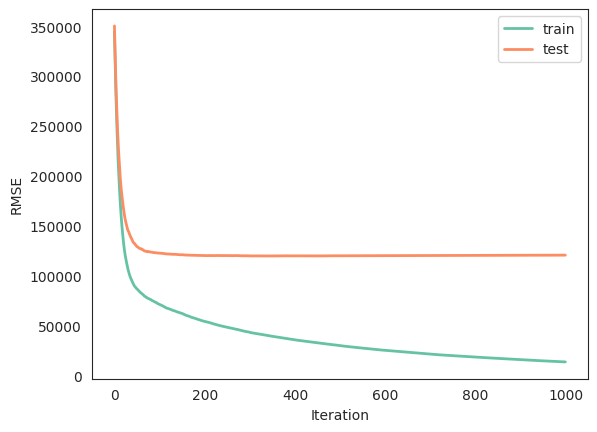

In [ ]:
# Create an XGBoost regressor with specified hyperparameters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import seaborn as sns
from copy import deepcopy
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
import pickle
from sklearn.metrics import mean_absolute_error,make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from scipy.sparse import csr_matrix,hstack
from sklearn.model_selection import KFold,train_test_split
from xgboost import XGBRegressor

reg_mod = xgb.XGBRegressor(
    n_estimators=1000,          # Number of boosting rounds
    learning_rate=0.08,        # Learning rate (step size for updates)
    subsample=0.75,            # Fraction of samples used for each boosting round
    colsample_bytree=1,        # Fraction of features used for each boosting round
    max_depth=7,               # Maximum depth of the individual trees
    gamma=0,                   # Minimum loss reduction to make further partitions
)

# Train the model and specify the evaluation dataset
eval_set = [(X_train, y_train), (X_test, y_test)]
reg_mod.fit(X_train, y_train, eval_set=eval_set, eval_metric='rmse', verbose=False)

# Plot the loss curve
sns.set_style("white")
palette = sns.color_palette("Set2", n_colors=2)

# Plot RMSE on the training and testing datasets for each boosting round
plt.plot(reg_mod.evals_result()['validation_0']['rmse'], label='train', color=palette[0], linewidth=2)
plt.plot(reg_mod.evals_result()['validation_1']['rmse'], label='test', color=palette[1], linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.savefig('Loss.png')  # Save the loss plot as an image file
plt.show()  # Display the loss plot


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions using the model
predictions = reg_mod.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE: %f" % (rmse))

# Calculate the R-squared (R^2) score
r2 = r2_score(y_test, predictions)
print("R^2 Score: %f" % (r2))


RMSE: 122608.959567
R^2 Score: 0.898428


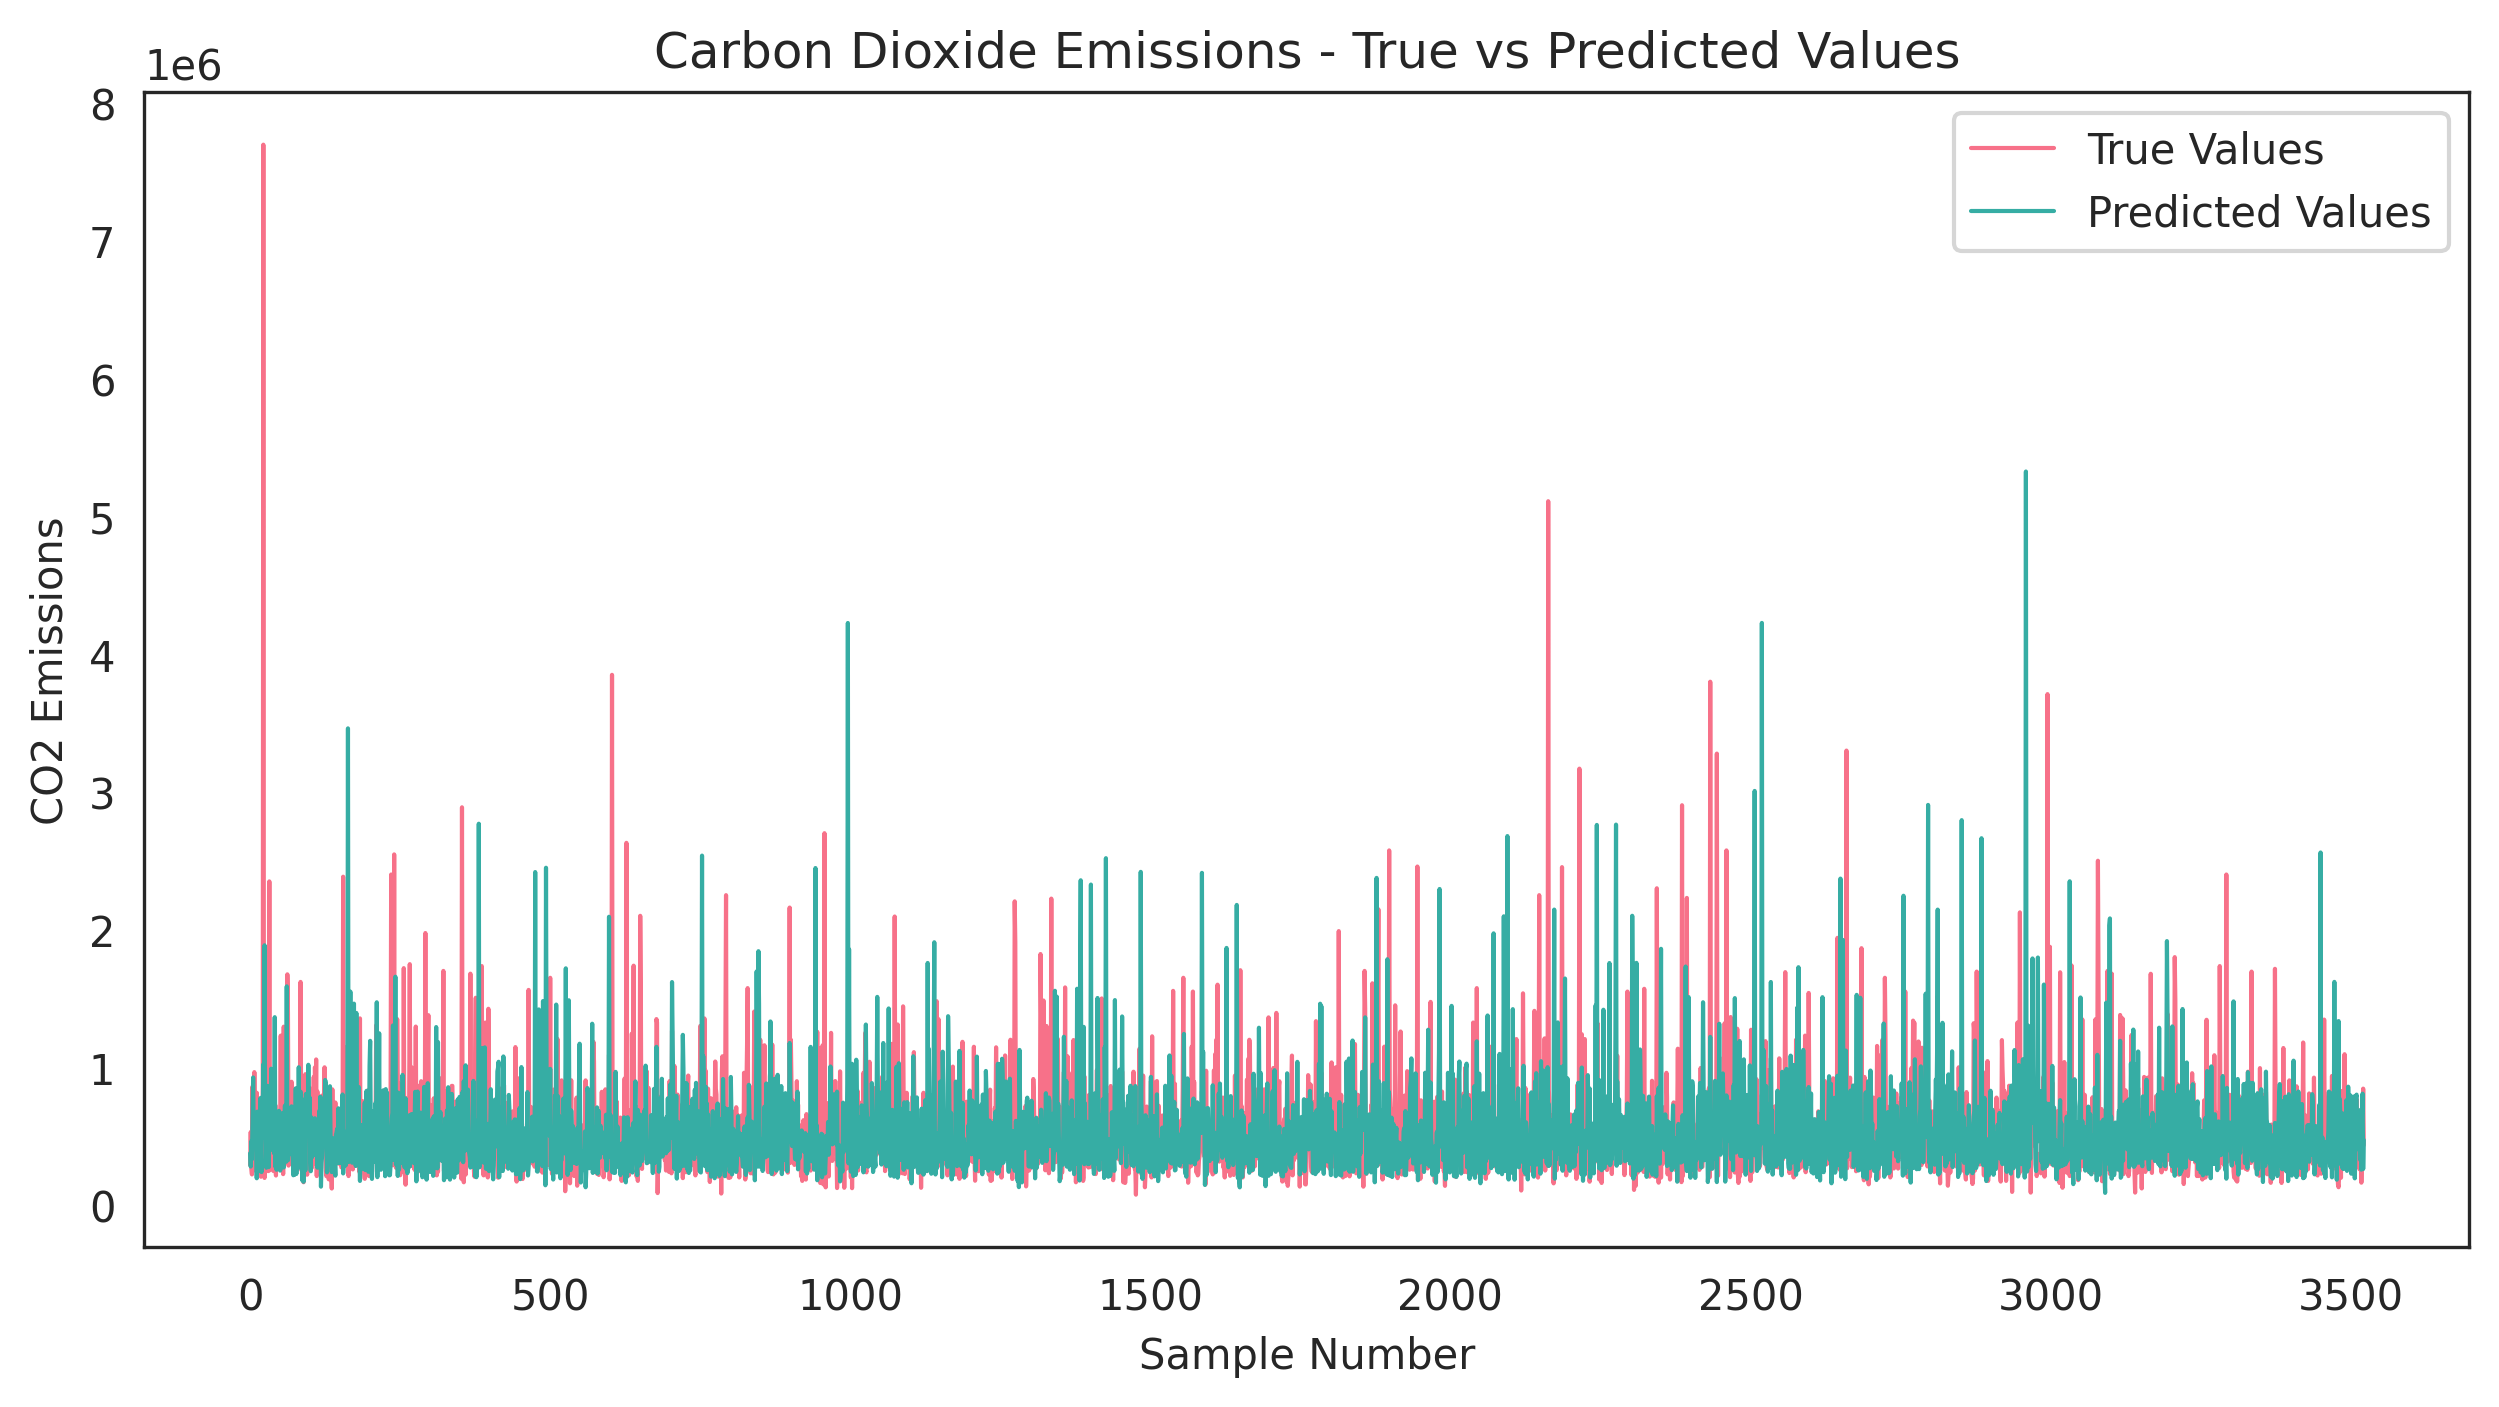

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn plot style to "white"
sns.set_style("white")

# Define a color palette for the plot
palette = sns.color_palette("husl", n_colors=2)

# Set the size and resolution of the figure
plt.figure(figsize=(10, 5), dpi=300)

# Create a line plot to display true values and model predictions for the test dataset
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="True Values", color=palette[0], linewidth=1)
plt.plot(x_ax, predictions, label="Predicted Values", color=palette[1], linewidth=1)

# Add a title and labels to the plot
plt.title("Carbon Dioxide Emissions - True vs Predicted Values")
plt.xlabel("Sample Number")
plt.ylabel("CO2 Emissions")

# Display the legend
plt.legend()

# Save the plot as an image file
plt.savefig('True vs Predicted Values.png')

# Show the plot
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()

TypeError: ignored

In [ ]:
test_data = pd.read_csv('test_dataset-1.csv')

X = df[all_params[best_model_index]]

predictions = reg_mod.predict(X)

print(predictions)

[454499.3  369042.84 224116.72 ... 299895.72 387250.   303718.25]


=======================================================================

In [ ]:
print(X_train.shape)
print(X_test.shape)

(14091, 16)
(3523, 16)


In [ ]:
linreg = LinearRegression(fit_intercept=True)

In [ ]:
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(linreg.intercept_)
print(X_train.columns)
print(linreg.coef_)

-39016715.802476086
Index(['sqft_living', 'view', 'waterfront', 'bedrooms', 'grade', 'yr_built',
       'lat', 'bathrooms', 'condition', 'long', 'sqft_basement',
       'yr_renovated', 'month_sold', 'sqft_living15', 'sqft_lot15',
       'sqft_lot'],
      dtype='object')
[ 1.71480380e+02  5.23366822e+04  5.20709045e+05 -3.06440096e+04
  1.00228215e+05 -2.33499030e+03  5.74895744e+05  4.10458008e+04
  3.16161795e+04 -1.27308635e+05 -3.60482212e+01  2.45166720e+01
 -2.68125274e+03  2.71100485e+01 -3.61833316e-01  1.19595945e-01]


In [ ]:
X_test.head()

,sqft_living,view,waterfront,bedrooms,grade,yr_built,lat,bathrooms,condition,long,sqft_basement,yr_renovated,month_sold,sqft_living15,sqft_lot15,sqft_lot
570,2340,0,0,3,8,1995,47.7347,2.50,3,-122.236,0,0,6,2340,6604,5957
5519,2130,0,0,4,7,1962,47.4133,2.00,3,-122.209,780,0,1,1550,8596,8400
1724,1920,0,0,4,8,1975,47.4476,1.75,4,-122.128,420,0,6,2100,7344,7665
4359,1820,0,0,3,8,1957,47.6737,1.75,4,-122.283,200,0,6,2330,6050,5500
11139,1980,0,0,4,7,1983,47.7513,3.00,4,-122.334,820,0,6,1910,7931,7931


In [ ]:
y_test.head()

570      505000
5519     250000
1724     341000
4359     659500
11139    395000
Name: price, dtype: int64

In [ ]:
y_test_predict = linreg.predict(X_test)

In [ ]:
y_test_predict = pd.DataFrame(y_test_predict, columns = ['price'])

y_test_predict.head()

,price
0,683446.366298
1,348329.330336
2,427800.179886
3,647417.949873
4,551558.751641


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [ ]:
loss_test = mean_squared_error(y_test, y_test_predict)

In [ ]:
loss_test

46972545347.447105

# Prediction for the Unknown Price

In [ ]:
#Import the test dataset csv file
from google.colab import files
uploaded = files.upload()

Saving test_dataset-1.csv to test_dataset-1.csv


In [ ]:
df_pred = pd.read_csv('test_dataset-1.csv')

In [ ]:
df_pred.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
import datetime
import time

In [ ]:
#change date column to date format
df_pred['date'] = pd.to_datetime(df_pred['date'])
#extract month from date column to a new month column
df_pred['month_sold']=df_pred['date'].dt.month

In [ ]:
X_train.columns

Index(['sqft_living', 'view', 'waterfront', 'bedrooms', 'grade', 'yr_built',
       'lat', 'bathrooms', 'condition', 'long', 'sqft_basement',
       'yr_renovated', 'month_sold', 'sqft_living15', 'sqft_lot15',
       'sqft_lot'],
      dtype='object')

In [ ]:
X_pred = df_pred[X_train.columns]

In [ ]:
y_pred = linreg.predict(X_pred)